## Image Recognition 
#### Multi class image classification
###### Aditya Hajare | https://www.linkedin.com/in/aditya-hajare

In [47]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense
import numpy as np

In [48]:
# conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (200,200,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [49]:
# fully connected layers
model.add(Flatten())  

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=4)) 

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
train_set = train_datagen.flow_from_directory('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/shapes/training_set', target_size=(200, 200), class_mode='categorical')

Found 14563 images belonging to 4 classes.


In [54]:
test_set = test_datagen.flow_from_directory('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/shapes/test_set', target_size=(200, 200), class_mode='categorical')

Found 400 images belonging to 4 classes.


In [55]:
model.fit(train_set, epochs=1, validation_data = test_set)


Train for 456 steps, validate for 13 steps
456/456 [==============================] - 494s 1s/step - loss: 0.0410 - accuracy: 0.9839 - val_loss: 6.2501e-05 - val_accuracy: 1.0000


In [56]:
# save Model
model.save('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/adi_shapes')
# keras.models.load_model('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/adi_shapes')

In [57]:
import numpy as np

from tensorflow.keras.preprocessing import image

img1 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/circle/64.png', target_size = (200,200))
img2 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/square/9.png', target_size = (200,200))
img3 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/start/25.png', target_size = (200,200))
img4 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/triangle/56.png', target_size = (200,200))
img5 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/circle/73.png', target_size = (200,200))
img6 = image.load_img('/Users/adiinviter/work/IIT/Assignments/Image_Recog_Assignments/data/test/start/80.png', target_size = (200,200))

In [58]:
# Convert image to array
img_arr1 = image.img_to_array(img1)
img_arr2 = image.img_to_array(img2)
img_arr3 = image.img_to_array(img3)
img_arr4 = image.img_to_array(img4)
img_arr5 = image.img_to_array(img5)
img_arr6 = image.img_to_array(img6)

In [59]:
img_reshape1=img_arr1.reshape(1, 200, 200, 3)
img_reshape2=img_arr2.reshape(1, 200, 200, 3)
img_reshape3=img_arr3.reshape(1, 200, 200, 3)
img_reshape4=img_arr4.reshape(1, 200, 200, 3)
img_reshape5=img_arr5.reshape(1, 200, 200, 3)
img_reshape6=img_arr6.reshape(1, 200, 200, 3)

In [60]:
res_around1=np.around(model.predict(img_reshape1))
res_around2=np.around(model.predict(img_reshape2))
res_around3=np.around(model.predict(img_reshape3))
res_around4=np.around(model.predict(img_reshape4))
res_around5=np.around(model.predict(img_reshape5))
res_around6=np.around(model.predict(img_reshape6))

In [61]:
shapes_arr = ['circle', 'square', 'star', 'triangle']

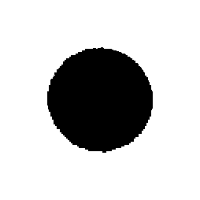

'circle'

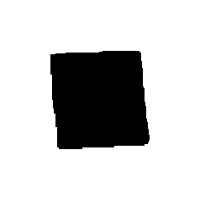

'square'

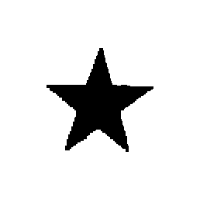

'star'

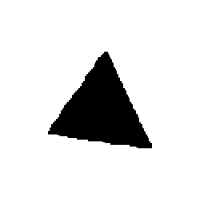

'triangle'

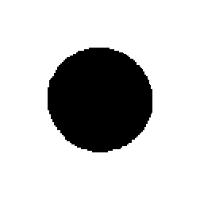

'circle'

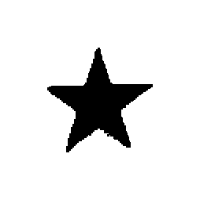

'star'

In [62]:
display(img1)
display(shapes_arr[res_around1.argmax()])

display(img2)
display(shapes_arr[res_around2.argmax()])

display(img3)
display(shapes_arr[res_around3.argmax()])

display(img4)
display(shapes_arr[res_around4.argmax()])

display(img5)
display(shapes_arr[res_around5.argmax()])

display(img6)
display(shapes_arr[res_around6.argmax()])